# TP4 (suite)

## Régularisation de Tikhonov
Dans toutes les questions vous allez utiliser certaines fonctions des librairies $\texttt{numpy}$ et $\texttt{scipy}$. Il est très important que vous consultiez attentivement l'aide de ces fonctions pour comprendre ce qu'elles font.

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Question 5
Générer le signal donné par la fonction mathématique 
$$f(x)=\sin(x/4) + 0.1 \cos(3x+1)+ \mathbb{1}_{ \cos(2x)}$$
Le dernier terme correspond à la fonction indicatrice, qui vaut $1$ si $\cos(2x)>0$ et $0$ sinon.

Votre signal aura $n$ échantillons sur l'intervalle $[0,3\pi]$.



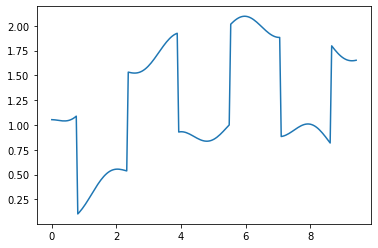

In [2]:
# Declare function
def f(u):
    return np.sin(u/4) + 0.1* np.cos(3*u +1) + (np.cos(2*u)>0)

# Generate points
n=200
x = np.linspace(0,3*np.pi,n)

# Plot function
plt.figure()
plt.plot(x,f(x))
plt.show()

### Question 6
- Générer un filtre gaussien de taille $p$. Vous utiliserez la fonction $\texttt{gaussian_filter1d}$ de la librairie $\texttt{scipy.ndimage}$

- Utiliser la fonction $\texttt{pad}$ de la librairie $\texttt{numpy}$ pour transformer votre signal de taille $n$ en un signal de taille $n+2p$ où les deux bords ont été symmétrisés.

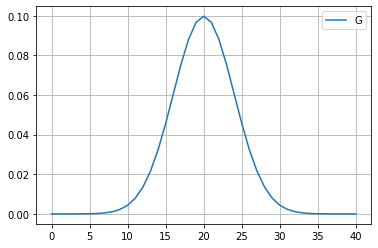

In [3]:
from scipy.ndimage import gaussian_filter1d

p = 20
dirac = np.zeros(2*p+1)
dirac[p] = 1
gf = gaussian_filter1d(dirac,4)


plt.plot(gf)
plt.legend("Gaussian Filter")
plt.grid()

x_non_padded = x
x = np.pad(x, (p,p), 'symmetric')

### Question 7
Générer la matrice $A$ du cours qui contient les informations du filtre gaussien. Vous pourrez utiliser la fonction $\texttt{spdiags}$ de la librairie $\texttt{scipy.sparse}$ qui crée une matrice à structure diagonale (consulter particulièrement l'aide).

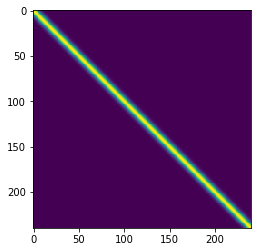

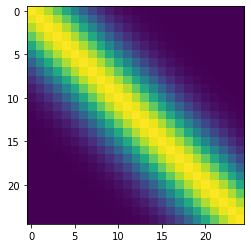

In [4]:
from scipy.sparse import spdiags
from numpy import matlib


data = matlib.repmat(gf,n+2*p,1)
k = np.transpose(data)
diags = np.arange(-p,p+1)
A = spdiags(np.transpose(data),diags,n+2*p, n+2*p).toarray()

plt.figure()
plt.imshow(A)
plt.show()

plt.figure()
plt.imshow(A[:25,:25])
plt.show()

### Question 8
Créer le signal observé après floutage (application de la matrice $A$) et ajout d'un bruit gaussien d'écart type $\sigma$. Pour cette dernière étape, vous utiliserez la fonction $\texttt{normal}$ de la librairie $\texttt{np.random}$.

Affichez sur une même figure le signal d'origine et le signal observé.

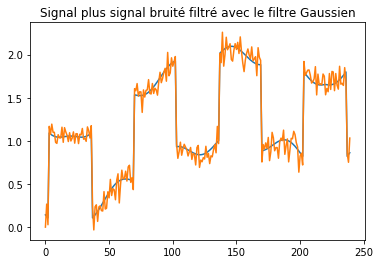

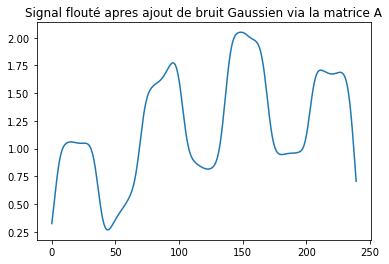

In [38]:
# Generate 
s = f(x)
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, len(x))

s=s+noise
sf = []
for i in range(len(s)):
    sf.append( np.dot(A,s)[i] )    

bs =  f(x) + noise

# First plot

plt.figure()
plt.title("Signal plus signal bruité filtré avec le filtre Gaussien")
plt.plot(f(x))
plt.plot(gaussian_filter1d(np.float_(bs),0.1))
plt.show()


# Second Plot
plt.figure()
plt.title("Signal flouté apres ajout de bruit Gaussien via la matrice A")
plt.plot(sf)
plt.show()


### Question 9
Ecrire une fonction qui implémente la résolution du problème inverse avec régularisation de Tikhonov. Votre fonction aura en entrée:

- Le vecteur  $B$ qui correspond au signal observé
- La matrice $A$ de floutage
- La matrice $L$ de régularisation,
- Le paramètre de régularisation $reg\_parameter$

Et renverra le signal reconstruit en utilisant la formule d'inversion de matrice vue en cours.
Vous aurez besoin

In [35]:
L = np.identity(n+2*p)
a = 0.005

In [36]:
def gradient(B,A,L,reg_parameter):
    return 2*np.dot(np.linalg.inv(2*np.dot(np.transpose(A),A)+ reg_parameter * np.dot(np.transpose(L),L)),2*np.dot(np.transpose(B),B))


for i in range(100):
    bs = bs - gradient(bs,A,L,a)

In [ ]:
def costfunction(X,y,theta):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;



def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    '''Gradient descent for linear regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)

        
        #Grad function in vectorized form
        h = X @ theta
        gradient = (1/m)*(X.T @ (h-y))
        theta = theta - alpha * gradient       
    return theta,J_history


g =  gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000)

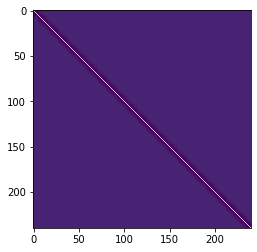

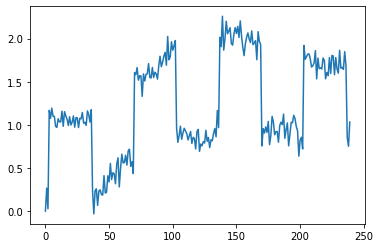

In [39]:
t.shape
d = np.diag(t)
plt.figure
plt.imshow(t)
plt.show()
plt.figure
plt.plot(bs)
plt.show()

In [20]:
def compute_cost(X, y, w, beta):
    """Compute the value of cost function, J.
    Here J is total Least Square Error
    """
    m = X.shape[0]
    J = (1. / (2. * m)) *(np.sum((np.dot(X, w) - y) ** 2.) + beta * np.dot(w.T, w))
            
    return J

def gradient_descent(X, y, w, num_iters, alpha, beta):
    """Performs Graddient Descent.
    The threshold is set by num_iters, instead of some value in this implementation
    """
    m = X.shape[0]
        # Keep a history of Costs (for visualisation)
    #J_all = np.zeros((num_iters, 1))

        # perform gradient descent
    for i in range(num_iters):
        #             print('GD: w: {0}'.format(w.shape))
        #J_all[i] = compute_cost(X, y, w, beta)

        w = w - (alpha / m) *(np.dot(X.T, (X.dot(w) - y[:, np.newaxis])) + beta * w)

    return w


w  = gradient_descent(x, f(x) , A, 2000, 0.1,0.1)

In [21]:
print(w)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
